In [16]:
import os
import datetime
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd


In [13]:
output_dir = r"D:\01 Files\04 University\00 Internships and theses\2. AI internship\EEG data\outputs"
# Info identifying the arch, checkpoint, version of code and whatever
run_dir = "2024-02-15_13-17-59 - v2 resnet50 ch1100"
#run_dir = "2024-02-16_15-54-47 - v2 resnet18 ch200"

# Add text to graph titles, if needed
additional_title_info = ""

# For resnet50 (for now)
selected_layers = ["layer4", "fc2"] 
# For resnet18
#selected_layers = ["layer2", "layer3", "layer4", "fc2"]

# Merge them
output_dir = os.path.join(output_dir, run_dir)

n_timepoints = 512
downsampling_factor = 4

# List of selected subjects
selected_subjects = range(5,36)


# List
selected_channels = ['Iz', 'Oz', 'POz', 'P3', 'P4']

original_sampling_rate = 1024

# EEG channels by name (const)
channel_order = ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'left', 'right', 'above', 'below']

# A subset of channels that are visual system related
################################ Define util funcs

# Get indexes of the selected channels
selected_channel_indexes = [channel_order.index(channel) for channel in selected_channels]

In [8]:
def plot_rs(data, labell="", ylabel="", title="", downsampling_factor=downsampling_factor):
    """Plot either an r2 or an r graph with a -100 to 400ms timeline"""

    # Length of the downsampled data
    downsampled_num_points = len(data)

    # Calculate original number of points
    original_num_points = downsampled_num_points * downsampling_factor

    # Calculate the corresponding time range
    time_range_seconds = original_num_points / original_sampling_rate  # Duration of original data in seconds
    time_range_ms = time_range_seconds * 1000  # Convert duration to milliseconds
    time_start_ms = -100  # Start time in milliseconds
    time_end_ms = time_start_ms + time_range_ms  # End time in milliseconds

    # Create time axis
    time_axis = np.linspace(time_start_ms, time_end_ms, downsampled_num_points)

    # Plot the graph
    plt.plot(time_axis, data, label=labell)
    plt.xlabel('Time (ms)')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.axvline(x=0, color='r', linestyle='--')  # Add a dashed vertical line at time = 0ms
    plt.grid(True)
    #plt.show()

In [9]:
def plot_channel(channel_data):
    """Do stuff with multiple channels on one layer and one subject"""
    pass


def plot_layer(layer_info, layer_name, sub):
    """Do stuff with multiple channels on one layer and one subject"""

    # Plot R2 
    plot_title = f"{run_dir} {additional_title_info} subject {sub} {layer_name}  TEST $R^2$"
    # Plot multiple lines in one thingy
    for channel, data in layer_info.items():
        plot_rs(data["test_r2s"], labell=channel, ylabel=f'$R^2$', title=plot_title)
    plt.legend(loc='best')
    plt.show()
    
    # Plot correlations
    plot_title = f"{run_dir} {additional_title_info} subject {sub} {layer_name} TEST CORRELATIONS"
    # Plot multiple lines in one thingy
    for channel, data in layer_info.items():
        plot_rs(data["test_rs"], labell=channel, ylabel=f'Pearson‛s  r', title=plot_title)
    plt.legend(loc='best')
    plt.show()
    

def plot_subject(subject_info):
    """Do stuff on multiple layers and channels on one subject"""
    pass


def plot_whatever(all_info):
    """Get all the data and do whatever u want"""
    pass

In [32]:
all_info = {}

# Initialize lists to hold flattened data
subject_list = []
layer_list = []
channel_list = []
stat_list = []
timepoint_list = []
value_list = []

# Loop over all data and load everything
for sub in selected_subjects:
    # Make dir
    subject_dir = os.path.join(output_dir, f"sub_{sub}")

    subject_info = {}
    
    for layer_name in selected_layers:
        # Get dir
        layer_dir = os.path.join(subject_dir, layer_name)

        # Dicts for all channels

        layer_info = {}
        
        for channel in selected_channels:
            #channel_name = channel_order[channel]
            # Get dir
            channel_dir = os.path.join(layer_dir, channel)

            # Load data
            train_rs = np.load(os.path.join(channel_dir, "train_rs.npy"))
            train_r2s = np.load(os.path.join(channel_dir, "train_r2s.npy"))
            train_betas = np.load(os.path.join(channel_dir, "train_betas.npy"))
            #train_lin_regs = np.load(os.path.join(channel_dir, "train_lin_regs.npy"))
            test_rs = np.load(os.path.join(channel_dir, "test_rs.npy"))
            test_r2s = np.load(os.path.join(channel_dir, "test_r2s.npy"))

            channel_data = {
            'train_rs': train_rs,
            'train_r2s': train_r2s,
            #'train_betas': train_betas,
            #'train_lin_regs': train_lin_regs,
            'test_rs': test_rs,
            'test_r2s': test_r2s,
            #'test_betas': test_betas
            }
            
            layer_info[channel] = channel_data

            # save the data length
            downsampled_num_points = len(test_rs)


            # Also make a "flat" list for pandas
            for stat, timepoints_array in channel_data.items():
                # Append the corresponding subject, layer, channel, stat for each timepoint
                for idx, timepoint in enumerate(timepoints_array):
                    subject_list.append(sub)
                    layer_list.append(layer_name)
                    channel_list.append(channel)
                    stat_list.append(stat)
                    timepoint_list.append(idx)
                    value_list.append(timepoint)

        #plot_layer(layer_info, layer_name, sub)
        
        subject_info[layer_name] = layer_info
    #plot_subject(subject_info)
    
    all_info[sub] = subject_info
#plot_whatever(all_info)

# save the data length
n_timepoint = len(test_rs)


# Create a pandas df
data_flat = pd.DataFrame({
    'Subject': subject_list,
    'Layer': layer_list,
    'Channel': channel_list,
    'Stat': stat_list,
    'Timepoint': timepoint_list,
    'Value': value_list
})

In [34]:

# Separate to avoid confusion / bugs

train_rs_df = data_flat[data_flat['Stat'] == 'train_rs']
train_r2s_df = data_flat[data_flat['Stat'] == 'train_r2s']
test_rs_df = data_flat[data_flat['Stat'] == 'test_rs']
test_r2s_df = data_flat[data_flat['Stat'] == 'test_r2s']

In [36]:
test_rs_df


,Subject,Layer,Channel,Stat,Timepoint,Value
258,5,layer4,Iz,test_rs,0,0.083892
259,5,layer4,Iz,test_rs,1,0.100368
260,5,layer4,Iz,test_rs,2,0.131990
261,5,layer4,Iz,test_rs,3,0.145356
262,5,layer4,Iz,test_rs,4,0.097179
...,...,...,...,...,...,...
159826,35,fc2,P4,test_rs,124,0.129069
159827,35,fc2,P4,test_rs,125,0.105867
159828,35,fc2,P4,test_rs,126,0.071110
159829,35,fc2,P4,test_rs,127,0.035880


In [50]:
# Average across subjects for each channel

n_timepoint = len(test_rs)

def get_average_per_channel(df):

     # Initialize an empty dictionary to store the average values for each channel at each timepoint
    average_values_dict = {channel: np.zeros(n_timepoint) for channel in selected_channels}
    
    # Nested loops to iterate over each channel and each timepoint
    for channel in selected_channels:
        for timepoint in range(n_timepoint):
            # Use boolean indexing to select data based on both timepoint and channel
            channel_timepoint_data = df[(df['Timepoint'] == timepoint) & (df['Channel'] == channel)]
            
            # Calculate the average value for the current channel and timepoint
            average_value = channel_timepoint_data['Value'].mean()
            
            # Store the average value in the dictionary
            average_values_dict[channel][timepoint] = average_value

    return average_values_dict


# test corrs
#train_rs_averages = get_average_per_channel(train_rs_df)
#train_r2s_averages = get_average_per_channel(train_r2s_df)
#test_rs_averages = get_average_per_channel(test_rs_df)
#test_r2s_averages = get_average_per_channel(test_r2s_df)


test_rs_layer4_averages = get_average_per_channel(test_rs_df[test_rs_df["Layer"] == "layer4"])


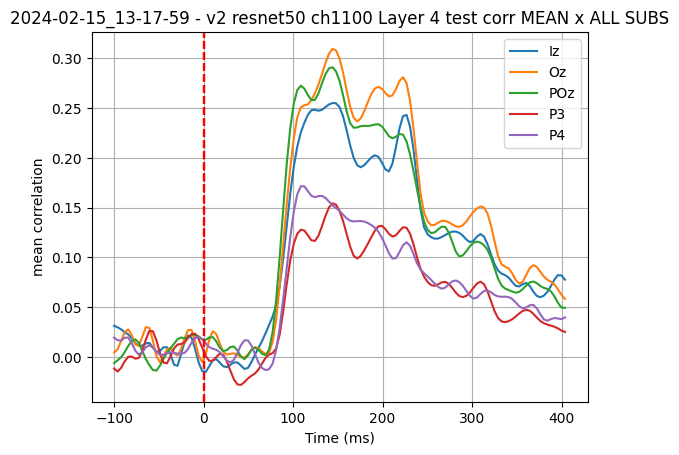

In [54]:

def plot_all_channels(layer_data, ylabel="", title=""):
    """Do stuff with multiple channels on one layer and one subject"""

    # Plot multiple lines in one thingy
    for channel, data in layer_data.items():
        plot_rs(data, labell=channel, ylabel=ylabel, title=title)
    plt.legend(loc='best')
    plt.show()


plot_all_channels(test_rs_layer4_averages, ylabel="mean correlation", title=f"{run_dir} Layer 4 test corr MEAN x ALL SUBS")

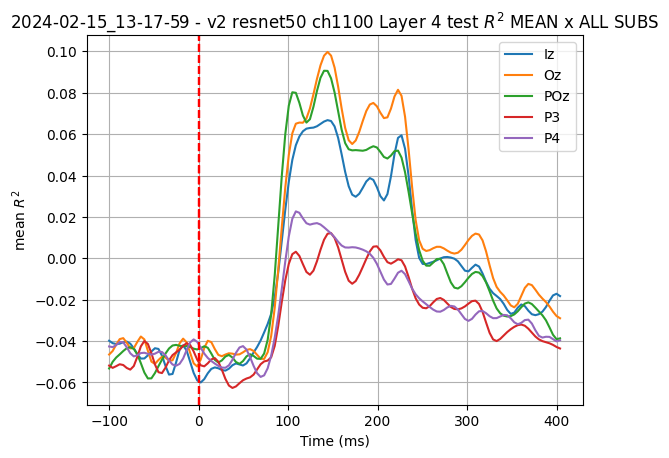

In [56]:
test_r2s_layer4_averages = get_average_per_channel(test_r2s_df[test_r2s_df["Layer"] == "layer4"])
plot_all_channels(test_r2s_layer4_averages, ylabel="mean $R^2$", title=f"{run_dir} Layer 4 test $R^2$ MEAN x ALL SUBS")